In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
may_data = pd.read_csv("../may_data.csv",parse_dates=["start_time","end_time"])
may_data.head(3)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Month,duration,day
0,628548,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,609,Subscriber,5,0 days 00:17:00,31
1,628549,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,1207,Subscriber,5,0 days 00:17:00,31
2,628550,2016-05-31 23:56:00,2016-06-01 00:15:00,90,320,Millennium Park,Loomis St & Lexington St,4369,Subscriber,5,0 days 00:19:00,31


In [3]:
may_data_time = may_data
may_data_time["hour"] = may_data_time["start_time"].apply(lambda x: x.hour)
may_data_time["duration"] = (may_data_time["end_time"] - may_data_time["start_time"]).astype("timedelta64[m]")
may_data_time.head(3)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Month,duration,day,hour
0,628548,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,609,Subscriber,5,17.0,31,23
1,628549,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,1207,Subscriber,5,17.0,31,23
2,628550,2016-05-31 23:56:00,2016-06-01 00:15:00,90,320,Millennium Park,Loomis St & Lexington St,4369,Subscriber,5,19.0,31,23


Add weather data

In [4]:
file_path = "C:/Users/Adrian/Documents/Studium/Projekte/DSML Bikesharing/PredictiveStruggle_BikeSharing"
weather = pd.read_csv(file_path+"/weather_hourly_chicago.csv",parse_dates = ["date_time"])
#add day feature
#only keep may 2016 data
weather = weather[weather["date_time"].apply(lambda x:x.year == 2016 and x.month == 5)]
weather = weather.dropna()
weather["hour"] = weather["date_time"].apply(lambda x:x.hour)
weather["day"] = weather["date_time"].apply(lambda x:x.day)
weather.sort_values(by="date_time")
weather.head(1)

,date_time,max_temp,min_temp,precip,hour,day
11640,2016-05-01,7.2,7.2,1.0,0,1


In [5]:
#merge
all_data = may_data_time.merge(weather[["max_temp","min_temp","precip","hour","day"]],left_on=["day","hour"],right_on=["day","hour"])
all_data.head(1)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Month,duration,day,hour,max_temp,min_temp,precip
0,628632,2016-05-31 22:59:00,2016-05-31 23:14:00,117,232,Wilton Ave & Belmont Ave,Pine Grove Ave & Waveland Ave,991,Customer,5,15.0,31,22,18.9,18.9,1.0


### Possible predictors
Predict number of rides next hour:
#### Temporal
hour
day
month
season

weekday
holiday
#### Weather
temperatur
precipitation

In [8]:
relevant_columns = all_data[["start_time","Month","day","hour","max_temp","precip","bike_id"]]
feature_data = relevant_columns.resample("H",on="start_time").agg({"Month":"mean","day":"mean","hour":"mean","max_temp":"mean","precip":"mean","bike_id":"count"})
feature_data.rename(columns={"bike_id":"trips"},inplace=True)
feature_data.head(1)

,Month,day,hour,max_temp,precip,trips
start_time,,,,,,
2016-05-01,5.0,1.0,0.0,7.2,1.0,25


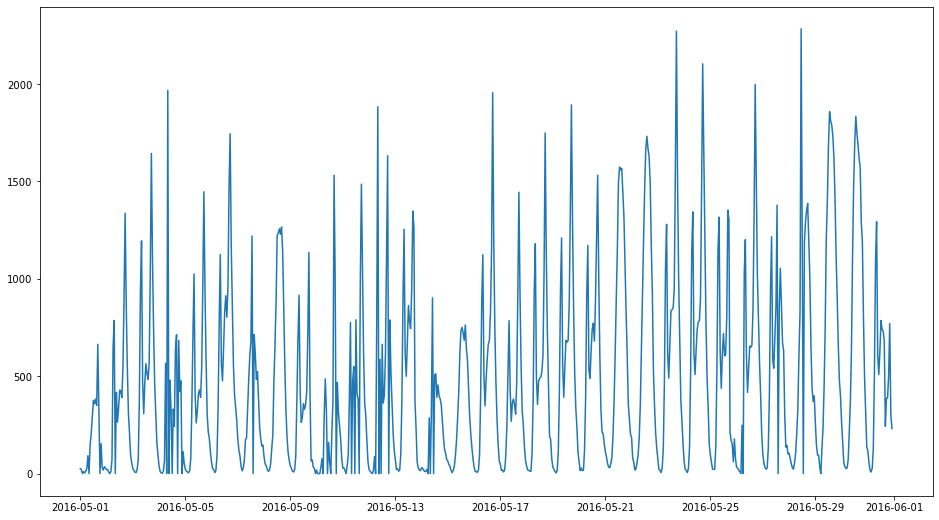

In [9]:
plt.figure(figsize=[16,9])
plt.plot(feature_data.index,feature_data["trips"])

Dont forget to include rental duration in system demand